---
# Análise Exploratória de Dados do FIFA 22 Dataset
---

#### Este notebook buscará responder as seguintes questões:
- Quais seleções possuem a maior soma salarial?
- Qual a seleção mais barata?
- Qual seleção possui a maior e a menor média de idade?
- Qual seleção possui maior média de Overall?
- Comparação entre valor de elenco entre Barcelona x Real Madrid.

> 

Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style(style='darkgrid')
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Carregando o dataset

In [2]:
fifa_22 = pd.read_csv("players_22.csv")
fifa_22.head(10)

C:\Users\jgabrielmelo\AppData\Local\Temp\ipykernel_3176\3465399662.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_22 = pd.read_csv("players_22.csv")


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,34+3,34+3,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


Informações do Dataframe

In [3]:
fifa_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


Lista de todas as colunas do DF

In [4]:
print(list(fifa_22.columns))

['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power

Deletando colunas irrelevantes para nossa análise

In [5]:
del_columns = ['sofifa_id','player_url','long_name','dob','club_loaned_from','nation_position','body_type','real_face','player_face_url','club_logo_url','club_flag_url','nation_logo_url','nation_flag_url','goalkeeping_speed','player_tags','nation_team_id']
fifa_22 = fifa_22.drop(del_columns, axis=1)
print(fifa_22.columns)

Index(['short_name', 'player_positions', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_team_id',
       'club_name', 'league_name', 'league_level', 'club_position',
       'club_jersey_number', 'club_joined', 'club_contract_valid_until',
       'nationality_id', 'nationality_name', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'release_clause_eur',
       'player_traits', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_sta

Descobrindo o shape e os tipos de dados deste DF

In [6]:
print(fifa_22.shape) # descobrindo o número de linhas e colunas
fifa_22.dtypes

(19239, 94)


short_name           object
player_positions     object
overall               int64
potential             int64
value_eur           float64
                     ...   
lcb                  object
cb                   object
rcb                  object
rb                   object
gk                   object
Length: 94, dtype: object

Descobrindo as estatísticas deste dataset

In [7]:
fifa_22.describe()

,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,club_jersey_number,...,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000
mean,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,20.945250,...,47.858724,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814
std,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,17.909369,...,15.768583,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833
min,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,1.000000,...,7.000000,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,9.000000,...,38.000000,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,18.000000,...,49.000000,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,27.000000,...,60.000000,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,99.000000,...,93.000000,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000


## Filtrando seleções com 23 ou mais jogadores
Desse modo, conseguimos apenas as seleções mais relevantes.

In [8]:
filtered_nations = fifa_22.groupby('nationality_name').filter(lambda x: len(x)>=23)
filtered_nations.nationality_name.value_counts()

England       1719
Germany       1214
Spain         1086
France         980
Argentina      960
              ... 
Gambia          26
Georgia         25
Bulgaria        24
Costa Rica      23
Montenegro      23
Name: nationality_name, Length: 73, dtype: int64

In [19]:
filtered_nations.head()

,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,73.0,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,21.0,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,11.0,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,73.0,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,10.0,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3


## Quais são as seleções mais valiosas?

In [9]:
# Top 10 seleções por soma salarial
nations_values = filtered_nations.groupby('nationality_name').sum()[['value_eur']].nlargest(10,['value_eur'])
nations_values.applymap(lambda x: '€ {0:.3f}bn'.format(x/1e9))

,value_eur
nationality_name,
Spain,€ 5.755bn
France,€ 4.604bn
Brazil,€ 4.577bn
England,€ 4.337bn
Germany,€ 3.412bn
Argentina,€ 3.128bn
Portugal,€ 2.270bn
Italy,€ 2.136bn
Netherlands,€ 1.903bn


### Visualizando

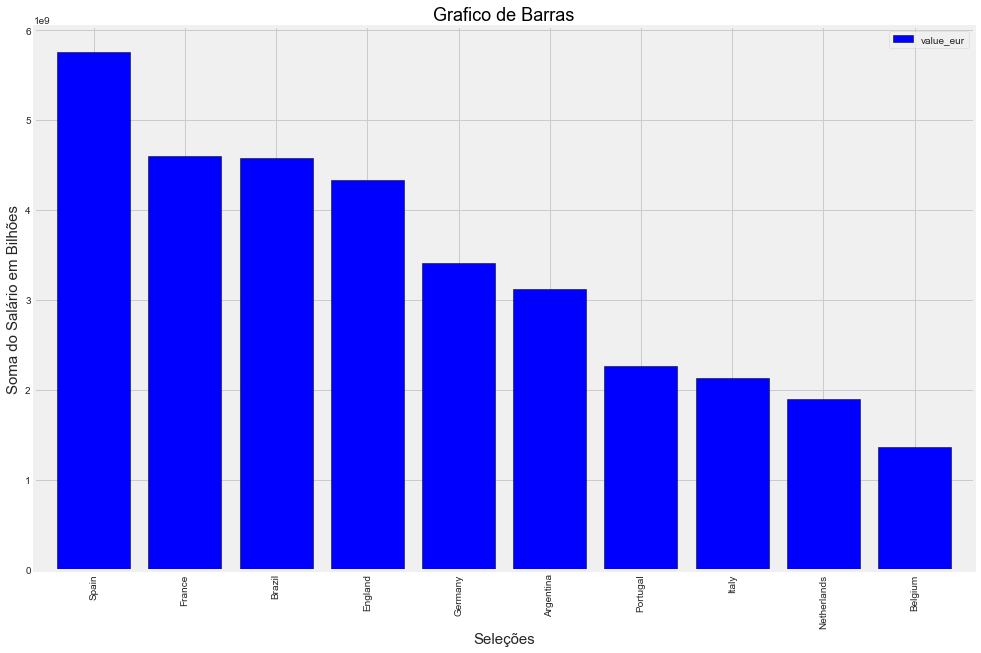

In [10]:
#matplotlib
nations_values.plot(kind='bar', figsize=(15,10), color='b', width=0.8, edgecolor='black');
plt.ylabel('Soma do Salário em Bilhões', fontsize=15);
plt.xlabel('Seleções', fontsize=15);
plt.title('Grafico de Barras', fontsize=18, color='black');

## Qual a seleção mais barata?

In [11]:
nations_costs = filtered_nations.groupby('nationality_name').sum()[['value_eur']].nsmallest(10, ['value_eur']).astype('int64')
nations_costs.applymap(lambda x: '€ {0:.3f}m'.format(x/1e6))

,value_eur
nationality_name,
Bulgaria,€ 20.340m
India,€ 40.125m
Georgia,€ 47.795m
Costa Rica,€ 48.425m
New Zealand,€ 50.240m
Gambia,€ 51.825m
Tunisia,€ 61.235m
North Macedonia,€ 71.670m
South Africa,€ 74.775m


R: A seleção mais barata, somando o valor de todos os seus jogadores, é a seleção búlgara.

## Visualizando

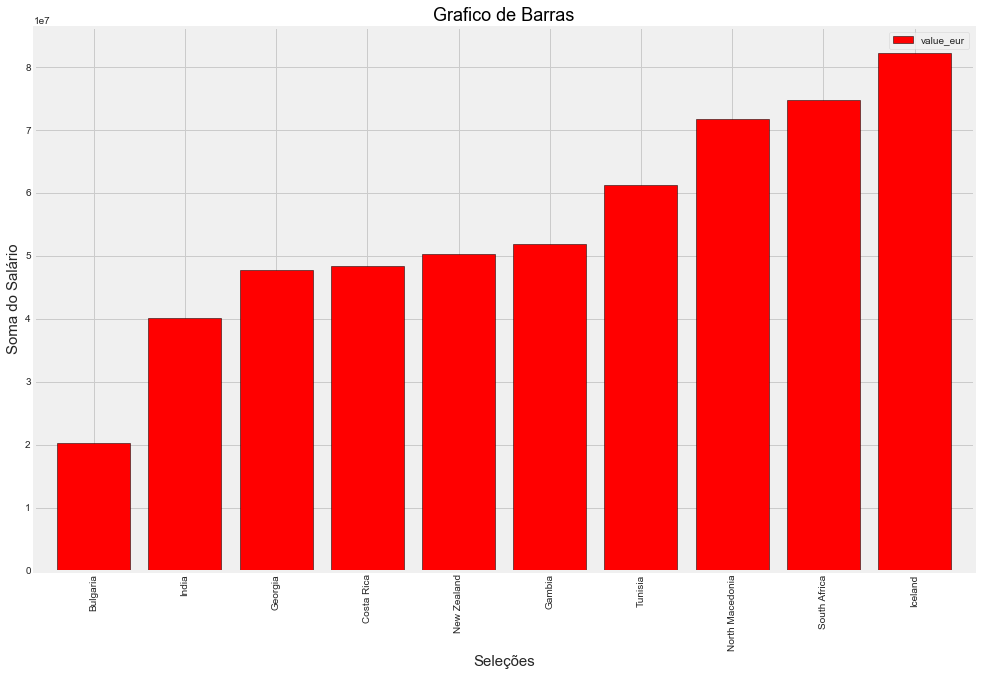

In [12]:
nations_costs.plot(kind='bar', figsize=(15,10), color='r', width=0.8, edgecolor='black');
plt.ylabel('Soma do Salário', fontsize=15);
plt.xlabel('Seleções', fontsize=15);
plt.title('Grafico de Barras', fontsize=18, color='black');

## Qual seleção possui a maior e menor média de idade?

In [13]:
age_nation = filtered_nations.groupby(['nationality_name']).mean()[['age']].nlargest(73,['age'])
print("Maior média de idade: ", age_nation.iloc[0])
print("Menor média de idade: ", age_nation.iloc[-1])

Maior média de idade:  age    28.043478
Name: Costa Rica, dtype: float64
Menor média de idade:  age    23.940774
Name: Netherlands, dtype: float64


## Qual seleção possui a maior média de Overall?

In [14]:
nations_overall = filtered_nations.groupby('nationality_name').mean()[['overall']].nlargest(10, ['overall'])
nations_overall

,overall
nationality_name,
Brazil,70.851728
Czech Republic,70.682692
Algeria,70.647059
Ukraine,70.507246
Italy,69.982249
Portugal,69.726542
Spain,69.563536
Morocco,69.485149
Montenegro,69.304348


R: A seleção com maior média de Overall é a do Brasil.

## Comparação entre o valor médio dos elencos entre Barcelona x Real Madrid.

In [15]:
bcn_rma_teams = fifa_22.loc[(fifa_22.club_name == 'Real Madrid CF') | (fifa_22.club_name == 'FC Barcelona')]
bcn_rma_teams # Dataframe contendo os jogadores do Real Madrid e Barcelona

bc_rma_values = bcn_rma_teams.groupby('club_name').mean()[['value_eur']]
bc_rma_values.astype('int64').applymap(lambda x: '€ {0:.1f}m'.format(x/1e6))

,value_eur
club_name,
FC Barcelona,€ 25.3m
Real Madrid CF,€ 29.9m


R: Percebe-se que o time do Real Madrid é mais valioso do que o time do Barcelona.

### Visualizando

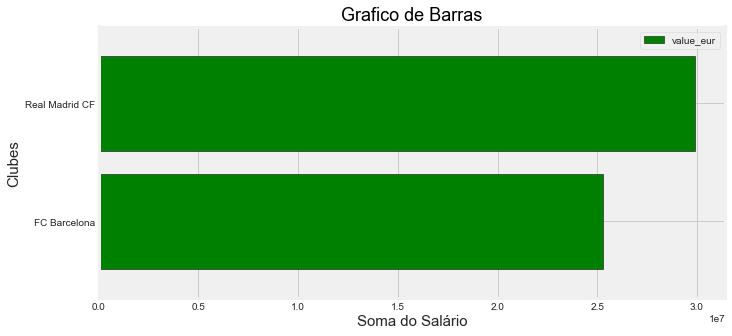

In [16]:
bc_rma_values.plot(kind='barh', figsize=(10,5), color='g', width=0.8, edgecolor='black');
plt.xlabel('Soma do Salário', fontsize=15);
plt.ylabel('Clubes', fontsize=15);
plt.title('Grafico de Barras', fontsize=18, color='black');